In [188]:
#############################################
#######   Final Project by Group 12    ######
#############################################

#basic library
import pandas as pd
import numpy as np

# Prepare for the train set and test set
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Functions for Generation
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Features Selection
from sklearn.decomposition import PCA

# Algorithm for ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Functions for evaluationb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

# Functions to visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Definations for Visualization Functions

In [158]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=1):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [159]:
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)
    plt.yticks(num_local, labels_name)
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

## Generate Dataframe

In [160]:
# generate the dataframe
df= pd.read_csv('overall_data.csv')
df

,DATE,DGS1,DGS3,DGS5,DGS10,10M1,10M3,10M5,5M1,5M3,...,volatility,average weekly volatility of past month,average weekly volatility of past quarter,return of past month,return of past half year,return of past year,rate of unemployment,core cpi,recession_bool,recession
0,1962/1/2,3.22,3.70,3.88,4.06,0.84,0.36,0.18,0.66,0.18,...,3.484467,3.115505,2.659260,-0.041593,0.026245,0.104609,5.8,1.3,False,0
1,1962/1/3,3.24,3.70,3.87,4.03,0.79,0.33,0.16,0.63,0.17,...,2.454618,3.004331,2.670604,-0.031685,-0.018337,0.075531,5.8,1.3,False,0
2,1962/1/4,3.24,3.69,3.86,3.99,0.75,0.30,0.13,0.62,0.17,...,2.454618,3.004331,2.670604,-0.031685,-0.018337,0.075531,5.8,1.3,False,0
3,1962/1/5,3.26,3.71,3.89,4.02,0.76,0.31,0.13,0.63,0.18,...,2.454618,3.004331,2.670604,-0.031685,-0.018337,0.075531,5.8,1.3,False,0
4,1962/1/8,3.31,3.71,3.91,4.03,0.72,0.32,0.12,0.60,0.20,...,2.454618,3.004331,2.670604,-0.031685,-0.018337,0.075531,5.8,1.3,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14519,2020/2/24,1.35,1.21,1.21,1.38,0.03,0.17,0.17,-0.14,0.00,...,1.756543,2.869429,2.137811,0.026061,0.131239,0.113730,3.5,2.4,False,0
14520,2020/2/25,1.30,1.16,1.16,1.33,0.03,0.17,0.17,-0.14,0.00,...,1.756543,2.869429,2.137811,0.026061,0.131239,0.113730,3.5,2.4,False,0
14521,2020/2/26,1.26,1.14,1.14,1.33,0.07,0.19,0.19,-0.12,0.00,...,1.756543,2.869429,2.137811,0.026061,0.131239,0.113730,3.5,2.4,False,0
14522,2020/2/27,1.18,1.08,1.11,1.30,0.12,0.22,0.19,-0.07,0.03,...,1.756543,2.869429,2.137811,0.026061,0.131239,0.113730,3.5,2.4,False,0


In [161]:
dfCor = df.corr().values

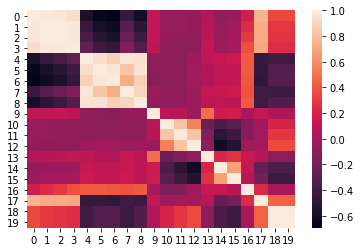

<Figure size 1440x1440 with 0 Axes>

In [162]:
# seaborn.heatmap(dfCor, center=0, annot=True, xticklabels=list('abcd'), yticklabels=list('ABCD'))
seaborn.heatmap(dfCor)
plt.figure(figsize=(20, 20))
plt.show()

In [163]:
#generate the demo dataframe
df = df[['10M1','10M3','recession']]
df

,10M1,10M3,recession
0,0.84,0.36,0
1,0.79,0.33,0
2,0.75,0.30,0
3,0.76,0.31,0
4,0.72,0.32,0
...,...,...,...
14519,0.03,0.17,0
14520,0.03,0.17,0
14521,0.07,0.19,0
14522,0.12,0.22,0


In [164]:
df.describe()

,10M1,10M3,recession
count,14524.000000,14524.000000,14524.000000
mean,1.017046,0.600284,0.171578
std,1.139047,0.711642,0.377026
min,-3.440000,-1.570000,0.000000
25%,0.180000,0.090000,0.000000
50%,0.940000,0.450000,0.000000
75%,1.810000,1.020000,0.000000
max,3.530000,2.450000,1.000000


In [165]:
dfDemo.describe()

,10M1,10M3
count,14524.000000,14524.000000
mean,1.017046,0.600284
std,1.139047,0.711642
min,-3.440000,-1.570000
25%,0.180000,0.090000
50%,0.940000,0.450000
75%,1.810000,1.020000
max,3.530000,2.450000


In [166]:
# get the ratio for recession
# print(f'The ratio of recession is {sum(df['recession']==True)/df.shape[0]}')
print('The ratio of recession is')
print(sum(df['recession']==True)/df.shape[0])

The ratio of recession is
0.1715780776645552


## Generate Train Set and Test Set

In [168]:
# generate the test stage
X, y = df.values[:, :-1], df.values[:, -1]

XTrain, XTest, yTrain, yTest =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [169]:
XTrain

array([[1.19, 0.62],
       [1.66, 0.74],
       [1.28, 0.67],
       ...,
       [0.89, 0.51],
       [2.49, 1.49],
       [1.39, 0.77]])

## Standardization and Feature Selection/Extraction

In [170]:
stdsc = StandardScaler()
XTrainStd = stdsc.fit_transform(XTrain)
XTestStd = stdsc.transform(XTest)

In [171]:
pca = PCA()
XTrainPca = pca.fit_transform(XTrainStd)
XTestPca = pca.transform(XTestStd)
XTrainPca
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [172]:
# plt.bar(range(1, 2), pca.explained_variance_ratio_, alpha=0.5, align='center')
# plt.step(range(1, 2), np.cumsum(pca.explained_variance_ratio_), where='mid')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')

# plt.show()

In [173]:
XTrainPca

array([[-0.11777395, -0.08757887],
       [-0.52840639, -0.26040904],
       [-0.22317953, -0.09390017],
       ...,
       [ 0.17743023, -0.01036012],
       [-1.78672359, -0.03246197],
       [-0.39054135, -0.06309343]])

## Apply LogisticRegression

In [174]:
lr = LogisticRegression(C=1, random_state=1)
lr.fit(XTrainPca, yTrain)

print('Training accuracy:', lr.score(XTrainPca, yTrain))
print('Test accuracy:', lr.score(XTestPca, yTest))

Training accuracy: 0.8595317725752508
Test accuracy: 0.8545204222120238


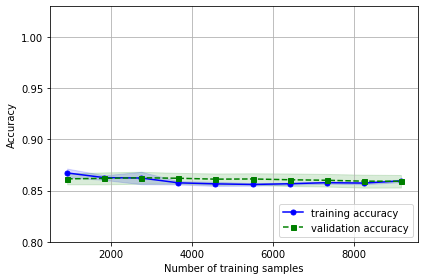

In [192]:
train_sizes_lr, train_scores_lr, test_scores_lr =\
                learning_curve(estimator=lr,
                               X=XTrainPca,
                               y=yTrain,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean_lr = np.mean(train_scores_lr, axis=1)
train_std_lr = np.std(train_scores_lr, axis=1)
test_mean_lr = np.mean(test_scores_lr, axis=1)
test_std_lr = np.std(test_scores_lr, axis=1)

plt.plot(train_sizes_lr, train_mean_lr,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes_lr,
                 train_mean_lr + train_std_lr,
                 train_mean_lr - train_std_lr,
                 alpha=0.15, color='blue')

plt.plot(train_sizes_lr, test_mean_lr,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes_lr,
                 test_mean_lr + test_std_lr,
                 test_mean_lr - test_std_lr,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

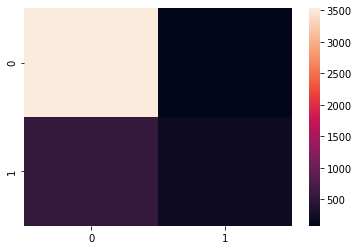

In [182]:
lr.predict(XTestPca)
lrConfusion= confusion_matrix(yTest, lr.predict(XTestPca), labels=[0, 1])
seaborn.heatmap(lrConfusion)
plt.show()

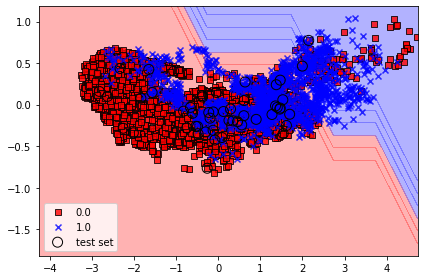

In [200]:
plot_decision_regions(X=XTrainPca, y=yTrain,
                      classifier=lr, test_idx=range(0, 50))
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

## Apply SVC

In [194]:
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(XTrainPca, yTrain)

print('Training accuracy is', svm.score(XTrainPca, yTrain))
print('Test accuracy:', svm.score(XTestPca, yTest))

Training accuracy: 0.8284477670666929
Test accuracy: 0.8283616337769619


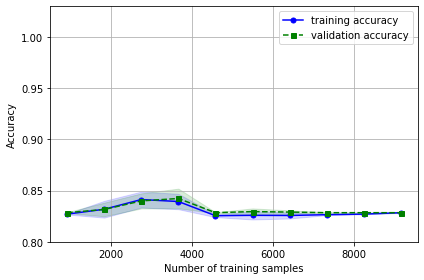

In [196]:
train_sizes_svm, train_scores_svm, test_scores_svm =\
                learning_curve(estimator=svm,
                               X=XTrainPca,
                               y=yTrain,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean_svm = np.mean(train_scores_svm, axis=1)
train_std_svm = np.std(train_scores_svm, axis=1)
test_mean_svm = np.mean(test_scores_svm, axis=1)
test_std_svm = np.std(test_scores_svm, axis=1)

plt.plot(train_sizes_svm, train_mean_svm,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes_svm,
                 train_mean_svm + train_std_svm,
                 train_mean_svm - train_std_svm,
                 alpha=0.15, color='blue')

plt.plot(train_sizes_svm, test_mean_svm,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes_svm,
                 test_mean_svm + test_std_svm,
                 test_mean_svm - test_std_svm,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

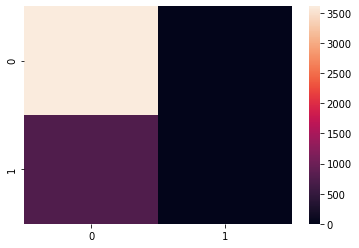

In [184]:
svmConfusion= confusion_matrix(yTest, svm.predict(XTestPca), labels=[0, 1])
seaborn.heatmap(svmConfusion)
plt.show()

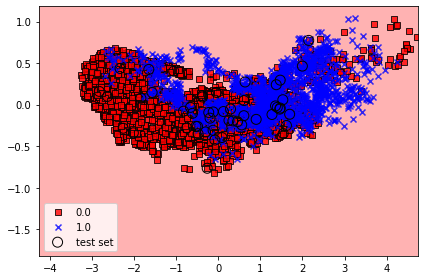

In [198]:
plot_decision_regions(X=XTrainPca, y=yTrain,
                      classifier=svm, test_idx=range(0, 50))
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

## Apply Decision Tree Classifier

In [185]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3, 
                              random_state=1)
tree.fit(XTrainPca, yTrain)
print('Training accuracy:', tree.score(XTrainStd, yTrain))
print('Test accuracy:', tree.score(XTestPca, yTest))

Training accuracy: 0.7039150108203817
Test accuracy: 0.8719596145020652


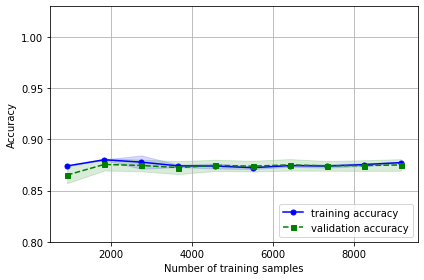

In [191]:
train_sizes_tree, train_scores_tree, test_scores_tree =\
                learning_curve(estimator=tree,
                               X=XTrainPca,
                               y=yTrain,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean_tree = np.mean(train_scores_tree, axis=1)
train_std_tree = np.std(train_scores_tree, axis=1)
test_mean_tree = np.mean(test_scores_tree, axis=1)
test_std_tree = np.std(test_scores_tree, axis=1)

plt.plot(train_sizes_tree, train_mean_tree,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes_tree,
                 train_mean_tree + train_std_tree,
                 train_mean_tree - train_std_tree,
                 alpha=0.15, color='blue')

plt.plot(train_sizes_tree, test_mean_tree,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes_tree,
                 test_mean_tree + test_std_tree,
                 test_mean_tree - test_std_tree,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

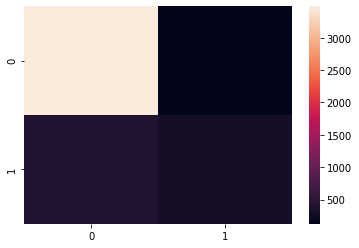

In [186]:
treeConfusion= confusion_matrix(yTest, tree.predict(XTestPca), labels=[0, 1])
seaborn.heatmap(treeConfusion)
plt.show()

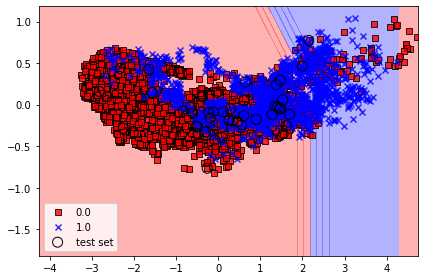

In [197]:
plot_decision_regions(X=XTrainPca, y=yTrain,
                      classifier=tree, test_idx=range(0, 50))
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()